In [6]:
try:
    __IPYTHON__
    from tqdm.notebook import tqdm
except NameError:
    from tqdm import tqdm

In [7]:
from src import extract_itsdb
from src import preprocess
from src import dg_util

In [20]:
import delphin
from delphin.codecs import simplemrs, dmrsjson
from delphin.dmrs import from_mrs
from delphin.mrs._exceptions import MRSError, MRSSyntaxError
from delphin.util import SExpr
from delphin.derivation import from_string, DerivationSyntaxError
from delphin import scope

from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image

In [13]:
from pprint import pprint
import gzip
import numpy as np
from collections import defaultdict, Counter
import math
import os

In [10]:
%load_ext autoreload
%autoreload 2

In [9]:
# ww1212tar_dir = "1212"
# extract_itsdb.main(ww1212tar_dir)

In [10]:
# ww1212_dir = "ww"
# preprocess.main(ww1212_dir)

## un-tar export files

In [115]:
ww1212tar_dir = "1212"
data_dir = "data"
profile_dir = "profile"
# untar the export files to exports, e.g. 1212/export0.tar to exports/export0

## Examine an instance

In [188]:
err2cnt = Counter()
cnt = 0
dmrs_json = None
dmrs_json_str = None
with gzip.open("exports/export5/uio/wikiwoods/1212/export/01025.gz", mode = 'rb') as f:
    text = f.read().decode("utf-8") 
    structs = text.split("\4")
    for idx, struct in enumerate(tqdm(structs)):
        
        # if idx != 2:
        #     continue
            
        id_snt, anc, yyinput, drv, cat, mrs, eds, dmrs_noScope, _ = struct.split("\n\n")
#         print (
# '''
# --sentence:\n{}\n
# --anchor:\n{}\n
# --yyinput:\n{}\n
# --derivation:\n{}\n
# --syntactic category:\n{}\n
# --minimal recursion semantics:\n{}\n
# --elementary dependency structure:\n{}\n
# --dmrs without scope info:\n{}\n
# '''.format(snt, anc, yyinput, drv, cat, mrs, eds, dmrs_noScope)
#         )
        id_snt = id_snt.strip()
        id_snt = id_snt.split("\n")[0]
        snt_id = id_snt.split("]", 1)[0][1:]
        # print (id_snt.split("`"))
        snt = id_snt.split("`")[1][:-1]
        
        dmrs_json, syn_tree, deriv = None, None, None
        
        try:
            dmrs = from_mrs(simplemrs.decode(mrs))
            dmrs_json = dmrsjson.to_dict(dmrs)
                #             except Exception as e:
                #     bad_syn_tree_sntid.add(key)
                # try:
                #     sntid2item[key]['derivation'] = delphin.derivation.from_string(result['derivation'])
                # except Exception as e:
                #     bad_deriv_sntid.add(key)
        except MRSSyntaxError as e:
            err2cnt['dmrs'] += 1
        
        try:
            syn_tree = SExpr.parse(cat).data
        except Exception as e:
            err2cnt['syn_tree'] += 1
        
        try:
            deriv = from_string(drv)
        except DerivationSyntaxError as e:
            err2cnt['deriv'] += 1
        
        if dmrs_json and syn_tree and deriv:
            for node in dmrs_json['nodes']:
                if 'unknown_rel' in node['predicate']:
                    
                    print (
        '''
        --id: {}
        --sentence: {}
        --dependency MRS:\n{}
        --syntax tree:\n{}
        --derivation tree:\n{}
        '''.format(snt_id, snt, dmrs_json, syn_tree, deriv)
                    )
                    input()
        
        
        

  0%|          | 0/1329 [00:00<?, ?it/s]


        --id_snt:
[1009250000000] (1 of 1) {1} `⌊δAcra (fortress)δ⌋'
        --id: 1009250000000
        --sentence: '⌊δAcra (fortress)δ⌋'
        --dependency MRS:
{'nodes': [{'nodeid': 10000, 'predicate': 'unknown_rel<2:17>', 'sortinfo': {'SF': 'prop-or-ques', 'cvarsort': 'e'}}, {'nodeid': 10001, 'predicate': 'proper_q_rel<2:17>'}, {'nodeid': 10002, 'predicate': 'parenthetical_rel<2:17>', 'sortinfo': {'cvarsort': 'i'}}, {'nodeid': 10003, 'predicate': 'udef_q_rel<7:17>'}, {'nodeid': 10004, 'predicate': 'named_rel<2:6>', 'sortinfo': {'PERS': '3', 'NUM': 'sg', 'IND': '+', 'cvarsort': 'x'}, 'carg': 'Acra'}, {'nodeid': 10005, 'predicate': '_fortress_n_1', 'sortinfo': {'PERS': '3', 'NUM': 'sg', 'IND': '+', 'cvarsort': 'x'}, 'lnk': {'from': 7, 'to': 17}}], 'links': [{'from': 10000, 'to': 10004, 'rargname': 'ARG', 'post': 'NEQ'}, {'from': 10001, 'to': 10004, 'rargname': 'RSTR', 'post': 'H'}, {'from': 10002, 'to': 10004, 'rargname': 'ARG1', 'post': 'EQ'}, {'from': 10002, 'to': 10005, 'rargna


        --id_snt:
[1009250000040] (1 of 1) {1} `After liberation of Jerusalem by the ⌊>Maccabees>⌋ a Greek garrison and local supporters of the Seleucids held out in the Acra for a considerable time.'
        --id: 1009250000040
        --sentence: 'After liberation of Jerusalem by the ⌊>Maccabees>⌋ a Greek garrison and local supporters of the Seleucids held out in the Acra for a considerable time.'
        --dependency MRS:
{'nodes': [{'nodeid': 10000, 'predicate': 'unknown_rel<0:151>', 'sortinfo': {'SF': 'prop-or-ques', 'cvarsort': 'e'}}, {'nodeid': 10001, 'predicate': '_after_p_rel<0:5>', 'sortinfo': {'SF': 'prop', 'TENSE': 'untensed', 'MOOD': 'indicative', 'cvarsort': 'e'}}, {'nodeid': 10002, 'predicate': 'udef_q_rel<6:48>'}, {'nodeid': 10003, 'predicate': '_liberation_n_of', 'sortinfo': {'PERS': '3', 'NUM': 'sg', 'cvarsort': 'x'}, 'lnk': {'from': 6, 'to': 16}}, {'nodeid': 10004, 'predicate': 'proper_q_rel<20:29>'}, {'nodeid': 10005, 'predicate': 'named_rel<20:29>', 'sortinfo': {'


        --id_snt:
[1009250100000] (1 of 1) {1} `⌊δAcradeniaδ⌋'
        --id: 1009250100000
        --sentence: '⌊δAcradeniaδ⌋'
        --dependency MRS:
{'nodes': [{'nodeid': 10000, 'predicate': 'unknown_rel<2:11>', 'sortinfo': {'SF': 'prop-or-ques', 'cvarsort': 'e'}}, {'nodeid': 10001, 'predicate': 'proper_q_rel<2:11>'}, {'nodeid': 10002, 'predicate': 'named_rel<2:11>', 'sortinfo': {'PERS': '3', 'NUM': 'sg', 'IND': '+', 'cvarsort': 'x'}, 'carg': 'Acradenia'}], 'links': [{'from': 10000, 'to': 10002, 'rargname': 'ARG', 'post': 'NEQ'}, {'from': 10001, 'to': 10002, 'rargname': 'RSTR', 'post': 'H'}], 'top': 10000, 'index': 10000}
        --syntax tree:
['XP', ['NP', ['N', ['N', 'Acradenia']]]]
        --derivation tree:
(ROOT_FRAG (22 NP_FRG_C 0.235194 0 1 (21 HDN_BNP-PN_C -0.210755 0 1 (20 N_SG_ILR -1.69983 0 1 (15 generic_proper_ne 0 0 1 ("Acradenia" 13 "token [ +CARG #1=\"Acradenia\" +CLASS proper_ne +FORM #1 +FROM \"2\" +ID *diff-list* [ LAST #2=*top* LIST *cons* [ FIRST \"1\" REST #2


        --id_snt:
[1009250100020] (1 of 1) {1} `⌊•⌊#⌊/⌊>Acradenia euodiiformis>⌋/⌋ ⌊↓(F.Muell.) T.G.Hartley↓⌋, native to ⌊>New South Wales>⌋ and ⌊>Queensland>⌋.#⌋'
        --id: 1009250100020
        --sentence: '⌊•⌊#⌊/⌊>Acradenia euodiiformis>⌋/⌋ ⌊↓(F.Muell.) T.G.Hartley↓⌋, native to ⌊>New South Wales>⌋ and ⌊>Queensland>⌋.#⌋'
        --dependency MRS:
{'nodes': [{'nodeid': 10000, 'predicate': 'unknown_rel<4:112>', 'sortinfo': {'SF': 'prop', 'cvarsort': 'e'}}, {'nodeid': 10001, 'predicate': 'appos_rel<4:112>', 'sortinfo': {'SF': 'prop', 'TENSE': 'untensed', 'MOOD': 'indicative', 'PROG': '-', 'PERF': '-', 'cvarsort': 'e'}}, {'nodeid': 10002, 'predicate': 'parenthetical_rel<4:47>', 'sortinfo': {'cvarsort': 'i'}}, {'nodeid': 10003, 'predicate': 'udef_q_rel<37:47>'}, {'nodeid': 10004, 'predicate': 'udef_q_rel<4:34>'}, {'nodeid': 10005, 'predicate': 'compound_rel<4:34>', 'sortinfo': {'SF': 'prop', 'TENSE': 'untensed', 'MOOD': 'indicative', 'PROG': '-', 'PERF': '-', 'cvarsort': 'e'}}, {'nod

KeyboardInterrupt: Interrupted by user

## Visualize a DMRS


In [147]:
name = 'test'
erg_digraphs = dg_util.Erg_DiGraphs()


In [172]:
"`\n\neji`jiji`ji".strip().split("\n")

'eji`jiji`ji'

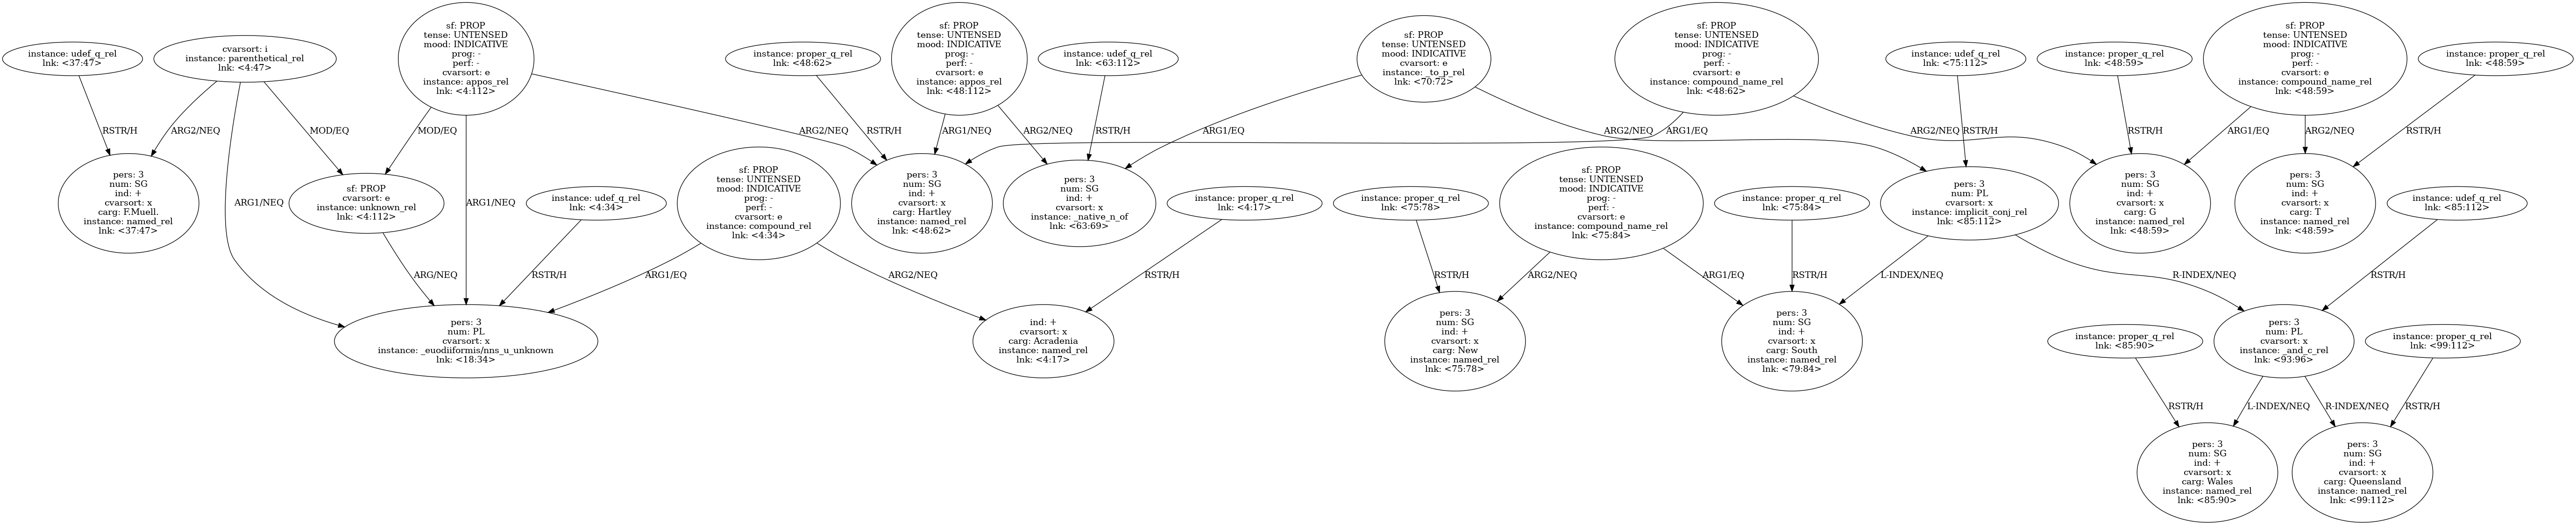

In [148]:
erg_digraphs.init_dmrsjson(dmrs_json, draw = True)
save_path = "./figures/dmrs_{}.png".format(name)#+ time.asctime( time.localtime(time.time()) ).replace(" ", "-") +".png"
ag = to_agraph(erg_digraphs.dmrs_dg)
ag.layout('dot')
ag.draw(save_path)
Image(save_path)

## Visualize a derivation tree


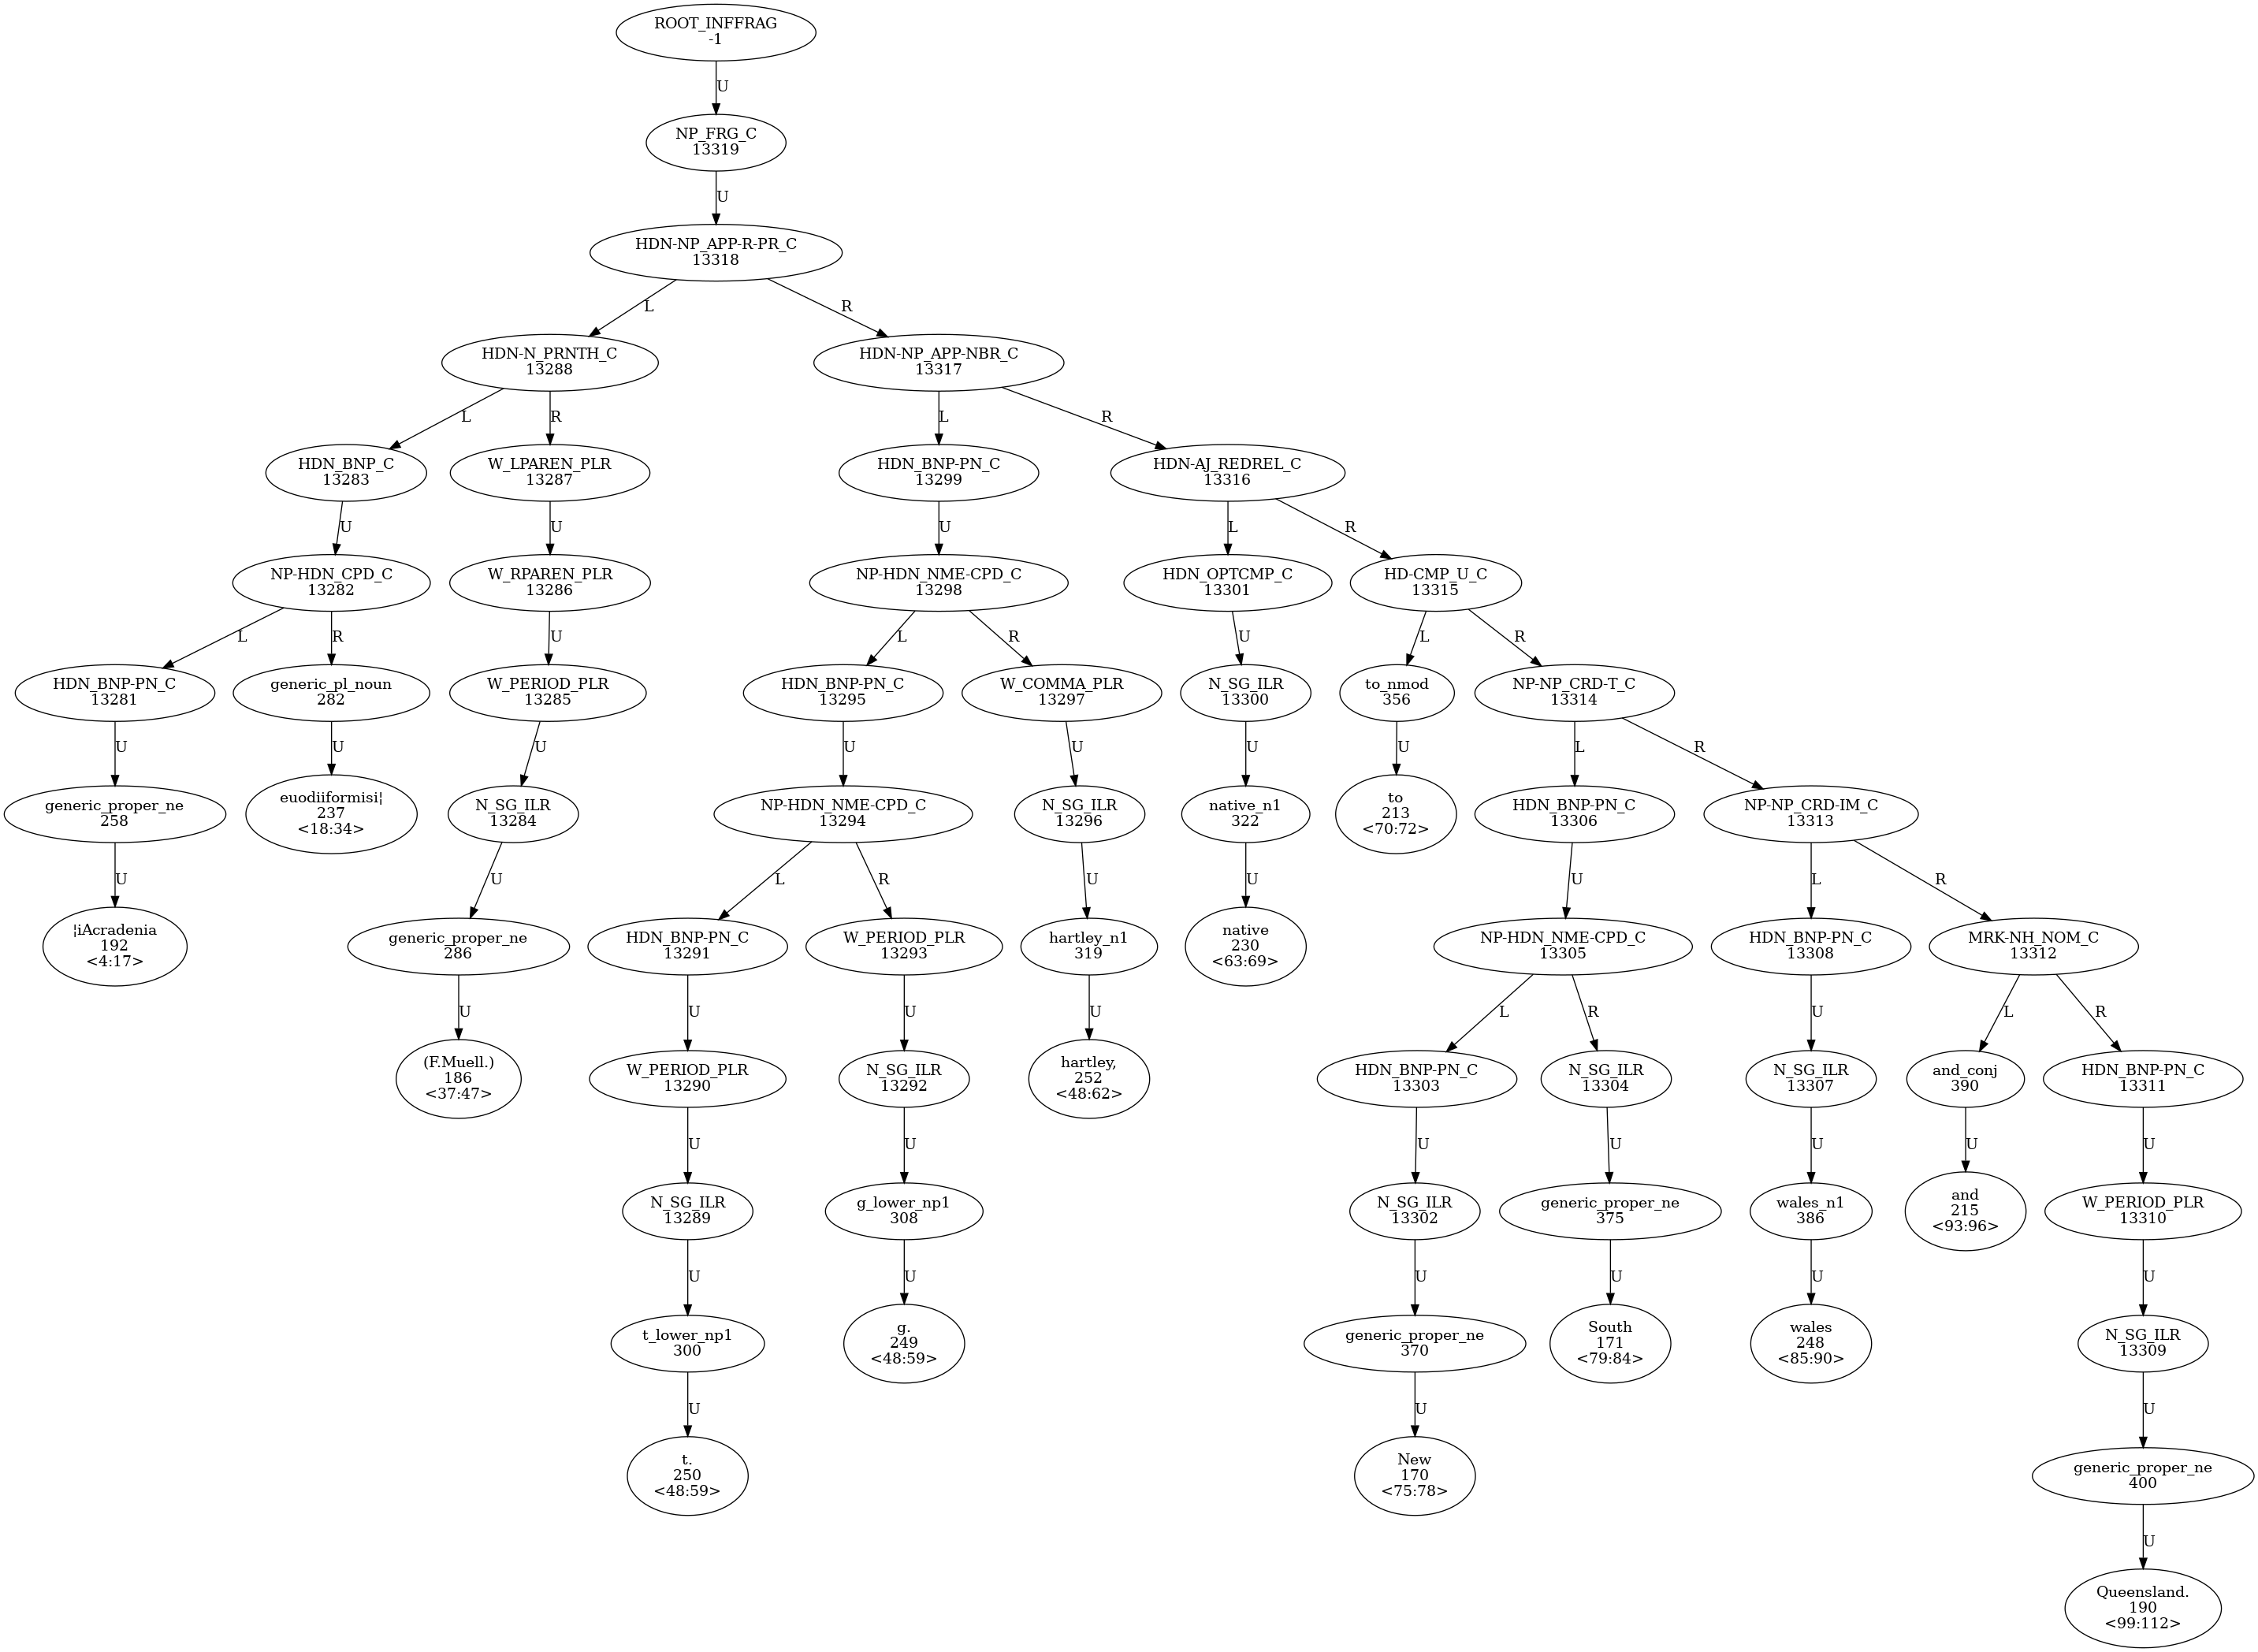

In [149]:
erg_digraphs.init_erg_deriv(deriv, draw = True)
save_path = "./figures/deriv_{}.png".format(name)#+ time.asctime( time.localtime(time.time()) ).replace(" ", "-") +".png"
ag = to_agraph(erg_digraphs.deriv_dg)
ag.layout('dot')
ag.draw(save_path)
Image(save_path)

## Visualize a syntax tree

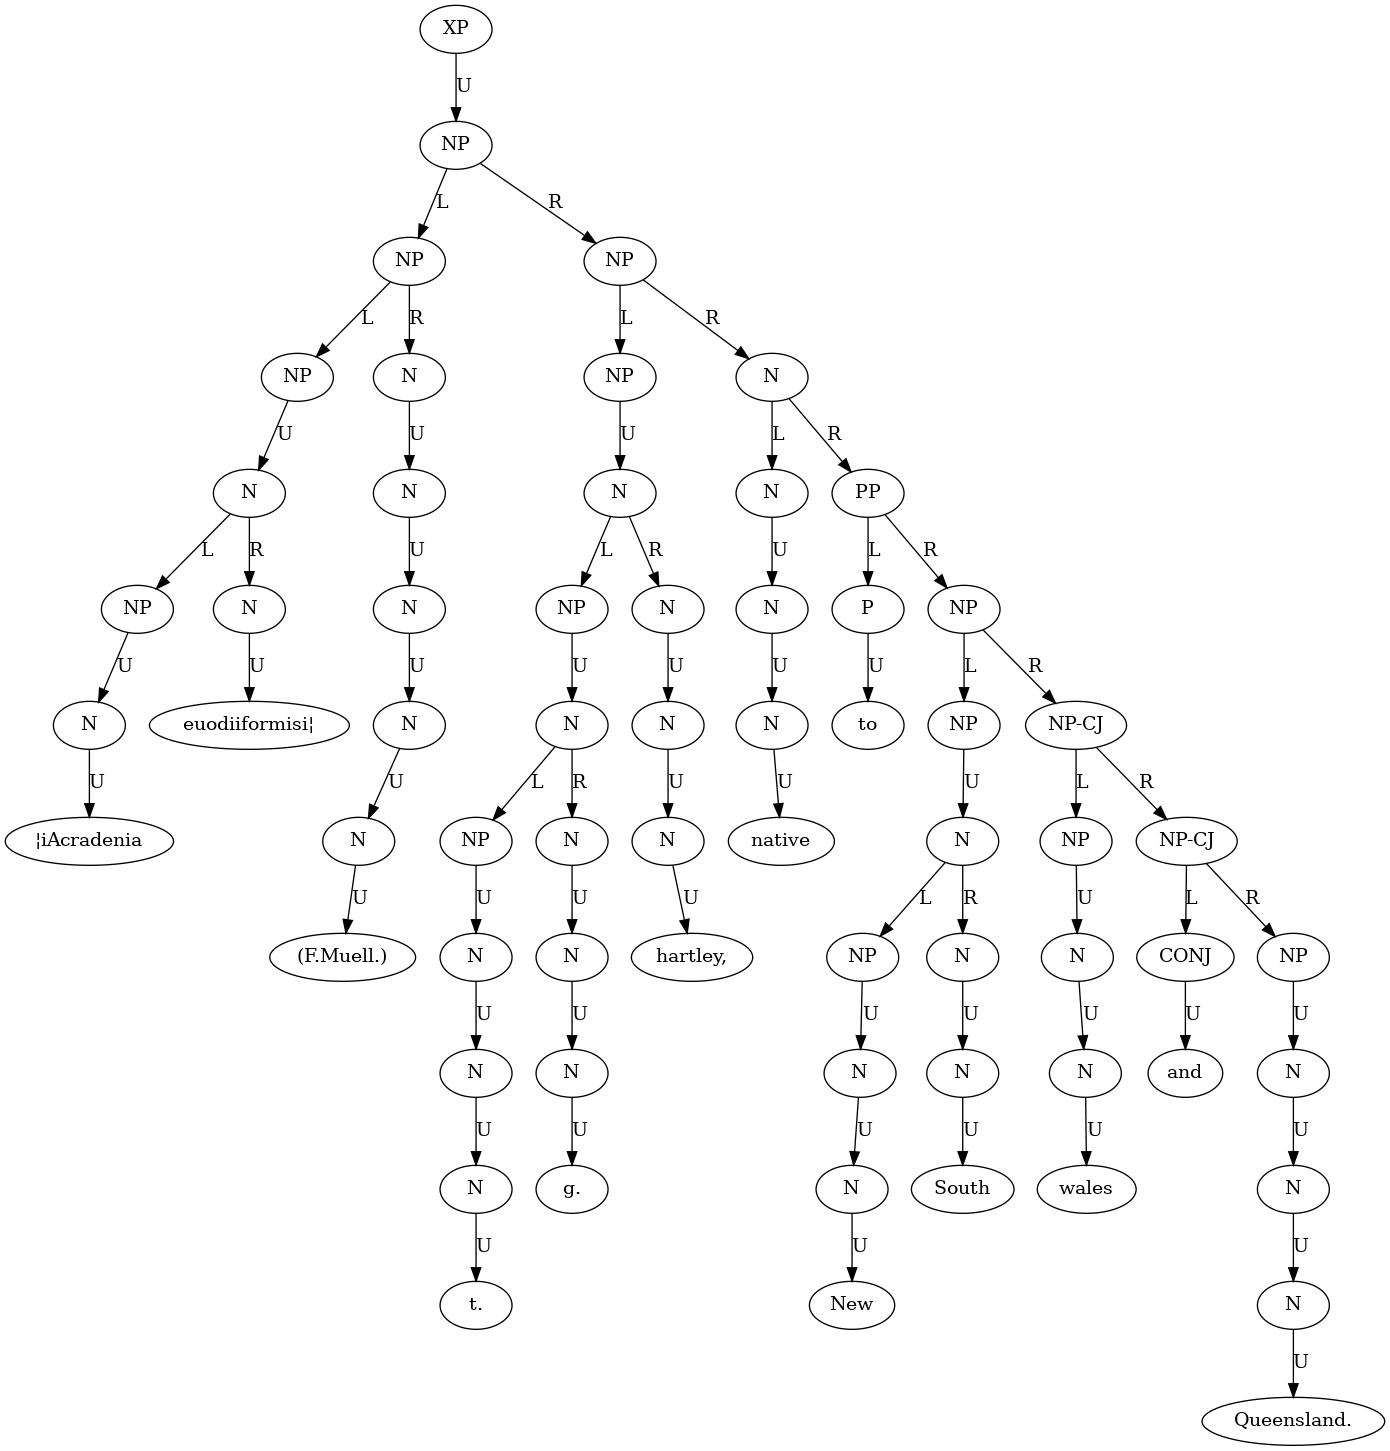

In [150]:
name = 'test'
erg_digraphs.init_syn_tree(syn_tree, draw = True)
save_path = "./figures/syn_tree_{}.png".format(name)#+ time.asctime( time.localtime(time.time()) ).replace(" ", "-") +".png"
ag = to_agraph(erg_digraphs.syn_tree_dg)
ag.layout('dot')
ag.draw(save_path)
Image(save_path)

## Add anchors to nonterminal and sync with syntax tree

In [142]:
deriv_root_node = -1
preprocess.propagate_anchors(erg_digraphs.deriv_dg, deriv_root_node)


most_det [('0', '4')] 0 4
DET_PRT-OF-AGR_DLR [('0', '4')] 0 4
of_prtcl [('5', '7')] 5 7
the_1 [('8', '11')] 8 11
generic_adj [('12', '19')] 12 19
black_n1 [('20', '25')] 20 25
AJ-HDN_NORM_C [('12', '19'), ('20', '25')] 12 25
marking_n1 [('26', '34')] 26 34
N_PL_OLR [('26', '34')] 26 34
N-HDN_CPD_C [('12', '25'), ('26', '34')] 12 34
SP-HD_N_C [('8', '11'), ('12', '34')] 8 34
HD-CMP_U_C [('5', '7'), ('8', '34')] 5 34
HD-CMP_U_C [('0', '4'), ('5', '34')] 0 34
HDN_BNP-QNT_C [('0', '34')] 0 34
be_c_are [('35', '38')] 35 38
obscure_a1 [('39', '47')] 39 47
W_COMMA_PLR [('39', '47')] 39 47
HD-CMP_U_C [('35', '38'), ('39', '47')] 35 47
be_id_being [('48', '53')] 48 53
only_deg [('54', '58')] 54 58
the_1 [('59', '62')] 59 62
SP-HD_HC_C [('54', '58'), ('59', '62')] 54 62
spot_n1 [('63', '68')] 63 68
N_PL_OLR [('63', '68')] 63 68
HDN_OPTCMP_C [('63', '68')] 63 68
on [('69', '71')] 69 71
the_1 [('72', '75')] 72 75
underside_n1 [('76', '85')] 76 85
N_SG_ILR [('76', '85')] 76 85
see_v1 [('86', '90')]

('0', '186')

In [143]:
syn_tree_root_node = 0
deriv_root_dgtr = list(erg_digraphs.deriv_dg.out_edges(-1))[0][1]
preprocess.syn_tree_anchors_from_deriv(erg_digraphs.syn_tree_dg, syn_tree_root_node,
                                       erg_digraphs.deriv_dg, deriv_root_dgtr)

True

In [109]:
pprint (list(erg_digraphs.deriv_dg.nodes(data=True)))

[(-1,
  {'anchor_from': '0',
   'anchor_to': '59',
   'end': 'None',
   'entity': 'ROOT_STRICT',
   'label': 'ROOT_STRICT\n-1',
   'score': 'None',
   'start': 'None'}),
 (1470,
  {'anchor_from': '0',
   'anchor_to': '59',
   'cat': 'S',
   'end': '8',
   'entity': 'SB-HD_MC_C',
   'label': 'SB-HD_MC_C\n1470',
   'score': '9.13322',
   'start': '0'}),
 (1458,
  {'anchor_from': '0',
   'anchor_to': '2',
   'cat': 'NP',
   'end': '1',
   'entity': 'HDN_BNP-QNT_C',
   'label': 'HDN_BNP-QNT_C\n1458',
   'score': '0.38032',
   'start': '0'}),
 (109,
  {'anchor_from': '0',
   'anchor_to': '2',
   'cat': 'NP',
   'end': '1',
   'entity': 'it2',
   'label': 'it2\n109',
   'score': '0.134999',
   'start': '0'}),
 (105,
  {'anchor_from': '0',
   'anchor_to': '2',
   'cat': 'it',
   'form': 'it',
   'label': 'it\n105\n<0:2>'}),
 (1469,
  {'anchor_from': '3',
   'anchor_to': '59',
   'cat': 'VP',
   'end': '8',
   'entity': 'HD-CMP_U_C',
   'label': 'HD-CMP_U_C\n1469',
   'score': '7.92149',
   's

In [118]:
import os
pred2cnt = Counter()
pred2logCnt = defaultdict(float)
pred2cnt_path = os.path.join(profile_dir, "pred2cnt.txt")
with open(pred2cnt_path, "r", encoding = 'utf-8') as f:
    line = f.readline()
    while line:
        pred, freq = line.split("\t")
        pred2cnt[pred] = int(freq)
        pred2logCnt[pred] = math.log(int(freq), 2)
        line = f.readline()
freqs = list(pred2cnt.values())
log_freqs = list(pred2logCnt.values())


In [119]:
pred2cnt['_if_x_then']

355976

## ACE parser

In [14]:
os.environ["LC_ALL"] ="en_US.UTF-8"
os.environ["LC_CTYPE"] ="en_US.UTF-8"

In [15]:
from delphin import ace
from delphin import scope

In [16]:
erg_path = "./erg/erg-1214-x86-64-0.9.34.dat"


In [62]:
text = 'No humans could survive with no water or oxygen.'
text = 'To recover from my exhausting race yesterday, in which I ran 50km, I slept deeply for many hours today, so I have not eaten anything yet, and, having woken up finally, I am extremely hungry now.'
text = 'large pet dogs with paws which no normal people are afraid of are gentle if it is raised properly or not trained.'
text = 'He is not running very happily.'
text = 'Kim knows that Sandy did not leave.'


In [63]:
ace_results = ace.parse(erg_path, text)
ace_results['readings']

NOTE: parsed 1 / 1 sentences, avg 9696k, time 0.14004s


15

In [64]:
mrs1 = ace_results.result(0).mrs()
mrs1.scopes()

('h1',
 {'h4': [<EP object (h4:proper_q(ARG0 x3, RSTR h5, BODY h6)) at 139907298304544>],
  'h7': [<EP object (h7:named(CARG Kim, ARG0 x3)) at 139907298478112>],
  'h1': [<EP object (h1:_know_v_1(ARG0 e2, ARG1 x3, ARG2 h9)) at 139907298478208>],
  'h10': [<EP object (h10:proper_q(ARG0 x11, RSTR h12, BODY h13)) at 139907298151104>],
  'h14': [<EP object (h14:named(CARG Sandy, ARG0 x11)) at 139908293627616>],
  'h16': [<EP object (h16:neg(ARG0 e17, ARG1 h18)) at 139907298371328>],
  'h19': [<EP object (h19:_leave_v_1(ARG0 e20, ARG1 x11, ARG2 p21)) at 139907298369888>]})

In [65]:
mrs2 = ace_results.result(1).mrs()
mrs2.scopes()

('h1',
 {'h4': [<EP object (h4:proper_q(ARG0 x3, RSTR h5, BODY h6)) at 139907298305600>],
  'h7': [<EP object (h7:named(CARG Kim, ARG0 x3)) at 139907297785312>],
  'h1': [<EP object (h1:_know_v_1(ARG0 e2, ARG1 x3, ARG2 h9)) at 139907298257600>],
  'h10': [<EP object (h10:proper_q(ARG0 x11, RSTR h12, BODY h13)) at 139907298258560>],
  'h14': [<EP object (h14:named(CARG Sandy, ARG0 x11)) at 139907298255872>],
  'h16': [<EP object (h16:neg(ARG0 e17, ARG1 h18)) at 139907298257984>],
  'h19': [<EP object (h19:_leave_v_1(ARG0 e20, ARG1 x11, ARG2 p21)) at 139907298258080>]})

In [66]:
descendants = scope.descendants(mrs1)
for id, ds in descendants.items():
    print(mrs1[id].predicate, [d.predicate for d in ds])

proper_q ['named']
named []
_know_v_1 ['neg', '_leave_v_1']
neg ['_leave_v_1']
_leave_v_1 []
proper_q ['named']
named []


In [67]:
descendants = scope.descendants(mrs2)
for id, ds in descendants.items():
    print(mrs2[id].predicate, [d.predicate for d in ds])

proper_q ['named']
named []
_know_v_1 ['neg', '_leave_v_1']
neg ['_leave_v_1']
_leave_v_1 []
proper_q ['named']
named []


In [61]:
scope.representatives(mrs1)

{'h4': [<EP object (h4:pron(ARG0 x3)) at 139907298305792>],
 'h5': [<EP object (h5:pronoun_q(ARG0 x3, RSTR h6, BODY h7)) at 139907298305696>],
 'h1': [<EP object (h1:neg(ARG0 e8, ARG1 h9)) at 139907298151008>],
 'h10': [<EP object (h10:_run_v_1(ARG0 e2, ARG1 x3)) at 139907298149856>]}

In [253]:
print (ace_results['results'][0]['mrs'])

[ LTOP: h0 INDEX: e2 [ e SF: prop TENSE: pres MOOD: indicative PROG: - PERF: - ] RELS: < [ udef_q<0:61> LBL: h4 ARG0: x3 [ x PERS: 3 NUM: pl IND: + ] RSTR: h5 BODY: h6 ]  [ compound<0:14> LBL: h7 ARG0: e8 [ e SF: prop TENSE: untensed MOOD: indicative PROG: - PERF: - ] ARG1: x3 ARG2: x9 [ x IND: + ] ]  [ udef_q<0:9> LBL: h10 ARG0: x9 RSTR: h11 BODY: h12 ]  [ _large_a_1<0:5> LBL: h13 ARG0: e14 [ e SF: prop TENSE: untensed MOOD: indicative PROG: - PERF: - ] ARG1: x9 ]  [ _pet_n_1<6:9> LBL: h13 ARG0: x9 ]  [ _dog_n_1<10:14> LBL: h7 ARG0: x3 ]  [ _with_p<15:19> LBL: h7 ARG0: e15 [ e SF: prop TENSE: untensed MOOD: indicative PROG: - PERF: - ] ARG1: x3 ARG2: x16 [ x PERS: 3 NUM: pl IND: + ] ]  [ udef_q<20:61> LBL: h17 ARG0: x16 RSTR: h18 BODY: h19 ]  [ _paw_n_1<20:24> LBL: h20 ARG0: x16 ]  [ _no_q<31:33> LBL: h21 ARG0: x22 [ x PERS: 3 NUM: pl IND: + ] RSTR: h23 BODY: h24 ]  [ _normal_a_1<34:40> LBL: h25 ARG0: e26 [ e SF: prop TENSE: untensed MOOD: indicative PROG: - PERF: - ] ARG1: x22 ]  [ _

In [255]:
for x, y in [(p.predicate, q) for p, q in mrs.quantification_pairs()]:
    if y: print (x,y)
for x, y in [(p.predicate, q) for p, q in mrs.quantification_pairs()]:
    if not y: print (x,y)

_pet_n_1 <EP object (h10:udef_q(ARG0 x9, RSTR h11, BODY h12)) at 140151469826208>
_dog_n_1 <EP object (h4:udef_q(ARG0 x3, RSTR h5, BODY h6)) at 140151807575232>
_paw_n_1 <EP object (h17:udef_q(ARG0 x16, RSTR h18, BODY h19)) at 140151469829088>
_people_n_of <EP object (h21:_no_q(ARG0 x22, RSTR h23, BODY h24)) at 140151469829280>
pron <EP object (h35:pronoun_q(ARG0 x34, RSTR h36, BODY h37)) at 140151469830048>
compound None
_large_a_1 None
_with_p None
_normal_a_1 None
_afraid_a_of None
_gentle_a_1 None
_if_x_then None
_raise_v_cause None
parg_d None
_proper_a_1 None
_or_c None
neg None
_train_v_1 None
parg_d None


In [229]:
mrs.scopal_arguments()

{'q3': [('RSTR', 'qeq', 'h7')],
 'e8': [],
 'q9': [('RSTR', 'qeq', 'h13')],
 'e14': [],
 'x9': [],
 'x3': [],
 'e15': [],
 'q16': [('RSTR', 'qeq', 'h20')],
 'x16': [],
 'q22': [('RSTR', 'qeq', 'h25')],
 'e26': [],
 'x22': [],
 'e28': [],
 'e2': [],
 'e30': [('ARG1', 'qeq', 'h29'), ('ARG2', 'qeq', 'h43')],
 'x34': [],
 'q34': [('RSTR', 'qeq', 'h33')],
 'e39': [],
 'e41': [],
 'e42': [],
 'e44': [('L-HNDL', 'lheq', 'h38'), ('R-HNDL', 'lheq', 'h46')],
 'e47': [('ARG1', 'qeq', 'h49')],
 'e45': [],
 'e51': []}

In [230]:
from delphin.dmrs import from_mrs
dmrs = from_mrs(mrs)

In [231]:
dmrs.scopes()

('h15',
 {'h1': [<Node object (10000:udef_q<0:61>[?]) at 140151469656384>],
  'h2': [<Node object (10001:compound<0:14>[e]) at 140151469826976>,
   <Node object (10006:_with_p<15:19>[e]) at 140151807574176>,
   <Node object (10005:_dog_n_1<10:14>[x]) at 140151469768608>],
  'h3': [<Node object (10002:udef_q<0:9>[?]) at 140151469827936>],
  'h5': [<Node object (10004:_pet_n_1<6:9>[x]) at 140151469828128>,
   <Node object (10003:_large_a_1<0:5>[e]) at 140151469828800>],
  'h8': [<Node object (10007:udef_q<20:61>[?]) at 140151807574560>],
  'h9': [<Node object (10008:_paw_n_1<20:24>[x]) at 140151808691456>,
   <Node object (10012:_afraid_a_of<52:58>[e]) at 140151807906144>],
  'h10': [<Node object (10009:_no_q<31:33>[?]) at 140151807905856>],
  'h12': [<Node object (10011:_people_n_of<41:47>[x]) at 140151807906048>,
   <Node object (10010:_normal_a_1<34:40>[e]) at 140151807905952>],
  'h14': [<Node object (10013:_gentle_a_1<66:72>[e]) at 140151807906240>],
  'h15': [<Node object (10014:_i

In [232]:
[(p.predicate, q) for p, q in dmrs.quantification_pairs()]

[('compound', None),
 ('_large_a_1', None),
 ('_pet_n_1', <Node object (10002:udef_q<0:9>[?]) at 140151469827936>),
 ('_dog_n_1', <Node object (10000:udef_q<0:61>[?]) at 140151469656384>),
 ('_with_p', None),
 ('_paw_n_1', <Node object (10007:udef_q<20:61>[?]) at 140151807574560>),
 ('_normal_a_1', None),
 ('_people_n_of', <Node object (10009:_no_q<31:33>[?]) at 140151807905856>),
 ('_afraid_a_of', None),
 ('_gentle_a_1', None),
 ('_if_x_then', None),
 ('pron', <Node object (10016:pronoun_q<76:78>[?]) at 140151807906528>),
 ('_raise_v_cause', None),
 ('parg_d', None),
 ('_proper_a_1', None),
 ('_or_c', None),
 ('neg', None),
 ('_train_v_1', None),
 ('parg_d', None)]

In [233]:
dmrs.scopal_arguments()

{10000: [('RSTR', 'qeq', 10005)],
 10001: [],
 10002: [('RSTR', 'qeq', 10004)],
 10003: [],
 10004: [],
 10005: [],
 10006: [],
 10007: [('RSTR', 'qeq', 10008)],
 10008: [],
 10009: [('RSTR', 'qeq', 10011)],
 10010: [],
 10011: [],
 10012: [],
 10013: [],
 10014: [('ARG1', 'qeq', 10013), ('ARG2', 'qeq', 10020)],
 10015: [],
 10016: [('RSTR', 'qeq', 10015)],
 10017: [],
 10018: [],
 10019: [],
 10020: [('L-HNDL', 'lheq', 10017), ('R-HNDL', 'lheq', 10021)],
 10021: [('ARG1', 'qeq', 10022)],
 10022: [],
 10023: []}